# Austin Real Estate Investment

### Where And Why To Buy

###### By Keith B, Vib Y, Karol C, and Aidin H

# Motivation
Our intent was to do an in-depth investigation of the housing market in Austin and study market-related variables to find which zip code would be most profitable to purchase a home in. 

# Hypothesis


# Data
The variables we looked at were: 

* House price by zip
* Household income by zip
* Current construction by zip
* Rate of change of construction by zip
* School ratings in each zip
* Types of businesses in zip




## House Price
For information about housing prices and mortgage rates, we used: 

<img src="https://d360wc4uc6n3i9.cloudfront.net/assets/images/logos/v2/quandl-word-mark-fb41d14c7a394be8118897fb977de828.svg"  width="200" height="200">
<img src="http://zillow.mediaroom.com/image/ForScreen_RGB_ZillowLogo_Blue-Square-Horizontal-medium.jpg"  width="200" height="200">



## Household Income
To get the information about household income, we used the 2011 through 2016 American Community Surveys done by the US Census Bureau with some data cleaning help from their American FactFinder search.
<img src="https://lmi.workforcegps.org/-/media/Communities/lmi/Images/Icons-and-Logos/CB-AFF-Logo.ashx?h=118&la=en&w=335"  width="200" height="200">


## Neighborhood Construction Dynamics
For information about past and current construction projects in the city, we used 
<img src="https://data.austintexas.gov/api/assets/CFBD7709-F5FF-4A82-B530-A5B892DE7BE4/?/data-austintexas-gov.png"  width="200" height="200">

## School Ranking
For school ratings, we used the GreatSchools.Org API.
<img src="https://www.greatschools.org/gk/wp-content/uploads/2016/07/GreatSchoolsLogo-social.png"  width="200" height="200">


## Local Buisness Information
For local business information, we accessed the Google Places API.
<img src="https://img.talkandroid.com/uploads/2015/07/google_maps_logo-450x450.png"  width="200" height="200">

# Tools
## Data / Numerical Computaton
* Numpy
* Pandas

## Visualization
* Matplotlib
* Seaborn
* Folium
* ArcGIS

## Modeling
* Scikit-learn
* Tensorflow
* Kera

## MISC
* Selenium
* Subprocess

# Preprocessing: 
After finding our data sources, our next step was to clean all of the data and merge it into one giant dataframe/csv file. From that file, we were able to do our analysis. 

* Detectin missing/nan values
* Nan removal
* Gap filling
* Interpolation
* Reframing data


# Cartographic Analysis



In [1]:
import pandas as pd
import numpy as np
import os, sys, inspect, time
try: 
    import subprocess
    import folium
    from folium.plugins import HeatMap
    from sklearn import preprocessing
    from selenium import webdriver
    from selenium.webdriver.chrome.options import Options
except:
    pass
    


# add parent dir to system dir
rootdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, rootdir)

from src.utils import get_temporal_data, get_spatial_data

# read main real state df
ffname_realestate = os.path.join(rootdir, "data", "int", "realestate_demographics.csv")
realestate_df = pd.read_csv(ffname_realestate)

# set indicator to plot
column_to_choroplethmap = "Home Value Index"

year = 2016
month = 12

df = get_spatial_data(year, realestate_df)
df = df.loc[df["Month"] == month, :]
df = df[["Zip Code", column_to_choroplethmap]]
df.reset_index(inplace=True)
df.drop(["index"], inplace=True, axis=1)
df["Zip Code"] = df["Zip Code"].astype(str)
df.dropna(inplace=True)
df.head()

,Zip Code,Home Value Index
0,78701,366600.0
1,78702,375200.0
2,78703,741800.0
3,78704,472100.0
4,78705,249600.0


In [2]:
# set choropleth map params
location = [30.3100, -97.8]
# set fill color
fill_color = "BuPu"
# set zoom in start level
zoom_start = 11
name = column_to_choroplethmap
max_val = df[column_to_choroplethmap].max()
min_val = df[column_to_choroplethmap].min()
threshold_scale = np.linspace(min_val, max_val, 6).tolist()


# create map
m = folium.Map(location, zoom_start=zoom_start)
ffname = os.path.join(rootdir, "data", "ext", "austin-zipcode-boundaries.geojson")
# create choropleth map
m.choropleth(
    geo_data=ffname,
    data=df,
    columns=["Zip Code", column_to_choroplethmap],
    key_on="feature.properties.zipcode",
    fill_color=fill_color)
m

## House Value vs Construction Dynamics: 
<img src='files/reports/figures/choroplethmap-home-value-index-2016-12.png' alt='drawing' height='1000px' width='1000px'/> | <img src='files/reports/figures/choroplethmap-total_newconstructions-2016-12.png' alt='drawing' height='1000px' width='1000px'/> | <img src='files/reports/figures/choroplethmap-totalcost_newconstructions-2016-12.png' alt='drawing' height='1000px' width='1000px'/>
:---:|:---:|:---:
House Home Value Index | New Constructions | Total Cost of New Constructions


## House Value vs Availability
| <img src='files/reports/figures/choroplethmap-home-value-index-2016-12.png' alt='drawing' height='1000px' width='1000px'/> | <img src='files/reports/figures/choroplethmap-inventory-measure-2016-12.png' alt='drawing' height='1000px' width='1000px'/> |
|:---:|:---:|
| House Home Value Index | New Constructions | 


## House Value vs School Quality: 

<img src='files/reports/figures/choroplethmap-home-value-index-2016-12.png' alt='drawing' height='1000px' width='1000px'/> | <img src='files/reports/figures/choroplethmap-school-ratinggs-2016-12.png' alt='drawing' height='1000px' width='1000px'/> | <img src='files/reports/figures/choroplethmap-school-rating-parent-2016-12.png' alt='drawing' height='1000px' width='1000px'/>
:---: | :---: | :---: 
*House Home Value Index* | *Great Schools Rating* | *Parent Ranking*

# House Value vs Retailers Count: 
 <img src='files/reports/figures/choroplethmap-home-value-index-2016-12.png' alt='drawing' height='1000px' width='1000px'/> | <img src='files/reports/figures/choroplethmap-target-count-2016-12.png' alt='drawing' height='1000px' width='1000px'/> | <img src='files/reports/figures/choroplethmap-wal-mart-count-2016-12.png' alt='drawing' height='1000px' width='1000px'/> 
:---:|:---:|:---:
 *House Home Value Index* | *Target Count*| *Walmart Count*
 <img src='files/reports/figures/choroplethmap-starbucks-count-2016-12.png' alt='drawing' height='1000px' width='1000px'/> | <img src='files/reports/figures/choroplethmap-liquor-store-count-2016-12.png' alt='drawing' height='1000px' width='1000px'/> | <img src='files/reports/figures/choroplethmap-bank-count-2016-12.png' alt='drawing' height='1000px' width='1000px'/> 
 *Starbucks Count* | *Liquor Store Count* | *Bank Count*


## House Value vs Household Dynamics: 
 <img src='files/reports/figures/choroplethmap-home-value-index-2016-12.png' alt='drawing' height='1000px' width='1000px'/> | <img src='files/reports/figures/choroplethmap-number-of-households-2016-12.png' alt='drawing' height='1000px' width='1000px'/> | <img src='files/reports/figures/choroplethmap-median-income-dollars-2016-12.png' alt='drawing' height='1000px' width='1000px'/> 
:---:|:---:|:---:|
 *House Home Value Index* | *Number of Households* | *Household Median Income* 



# Correlation Analysis 
One of the first assumptions that we wanted to test was to verify that home prices would go up in an area as the median income increased. To check this out, we made a scatter plot of Home Value vs Median Income for each zip code in Austin for each year between 2011 and 2016 (these were the only years we had income data for). 

In [3]:
import seaborn as sns
import pandas as pd
import os, sys, inspect
import numpy as np
import matplotlib.pyplot as plt
# add parent dir to system dir
rootdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, rootdir)

from src.plot import scatter
sns.set_style("whitegrid")

ffname = os.path.join(rootdir, "data", "int", "realestate_demographics.csv")
real_estate_info = pd.read_csv(ffname)
real_estate_info = real_estate_info.dropna(subset=["Median Income (dollars)", "Home Value Index"])
real_estate_info = real_estate_info.loc[real_estate_info["Month"] == 12]



Text(0.5,1,'Home Value vs Median Income, by year')

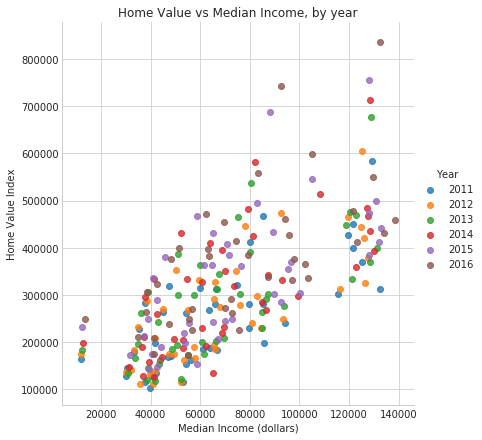

In [4]:
sns.lmplot(x="Median Income (dollars)", y="Home Value Index",
           data=real_estate_info, fit_reg=False,
           hue='Year',
           legend=True,
           size = 6)
plt.title("Home Value vs Median Income, by year")

Another common assumption that we wanted to analyze was that a neighborhood's income level could be determined by which businesses it contained. For example, if there were more Starbucks in a neighborhood, it was likely to be a more wealthy neighborhood. Whereas, an area in which there were a lot of liquor stores was likely to be a poorer neighborhood. 

In [5]:
ffname = os.path.join(rootdir, "data", "int", "realestate_demographics.csv")
real_estate_info = pd.read_csv(ffname)
real_estate_info = real_estate_info.dropna(subset=["Starbucks Count", "Median Income (dollars)"])
real_estate_info = real_estate_info.loc[real_estate_info["Month"] == 1]
real_estate_info = real_estate_info.loc[real_estate_info["Year"] == 2016]

Text(0.5,1,'Income vs Number of Starbucks')

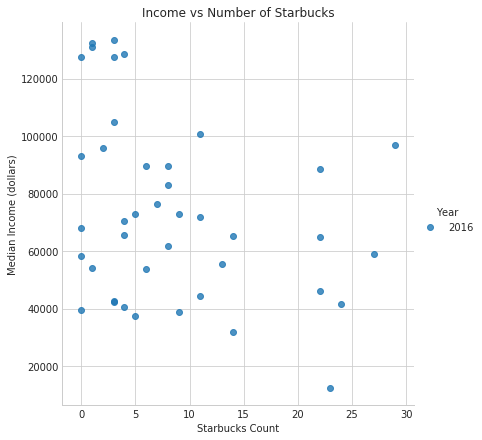

In [6]:
sns.lmplot(x="Starbucks Count", y="Median Income (dollars)", data=real_estate_info, fit_reg=False, hue='Year', legend=True, size = 6)
plt.title("Income vs Number of Starbucks")

In [7]:
ffname = os.path.join(rootdir, "data", "int", "realestate_demographics.csv")
real_estate_info = pd.read_csv(ffname)
real_estate_info = real_estate_info.dropna(subset=["Liquor Store Count", "Median Income (dollars)"])
real_estate_info = real_estate_info.loc[real_estate_info["Month"] == 1]
real_estate_info = real_estate_info.loc[real_estate_info["Year"] == 2016]

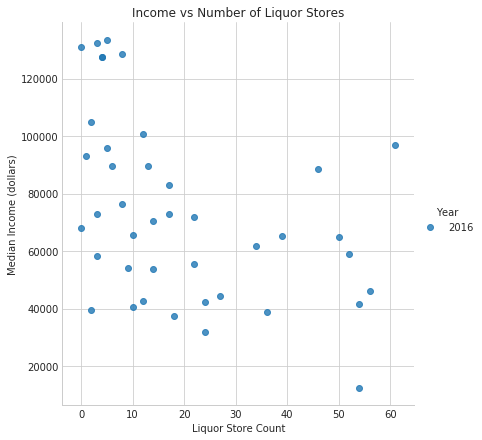

In [8]:
sns.lmplot(x="Liquor Store Count",
           y="Median Income (dollars)",
           data=real_estate_info,
           fit_reg=False,
           hue='Year',
           legend=True,
           size = 6)
_ = plt.title("Income vs Number of Liquor Stores")

However, based on the Austin area, both hypotheses seem to have been disproven as there appears to be little or no correlation between income and the number of these types of businesses in a given zip code. 

Another element of the housing market that we wanted to investigate was the effect of new construction on the prices in a zip code. To start this analysis, we wanted to look at general trends in the amount of construction over time. 

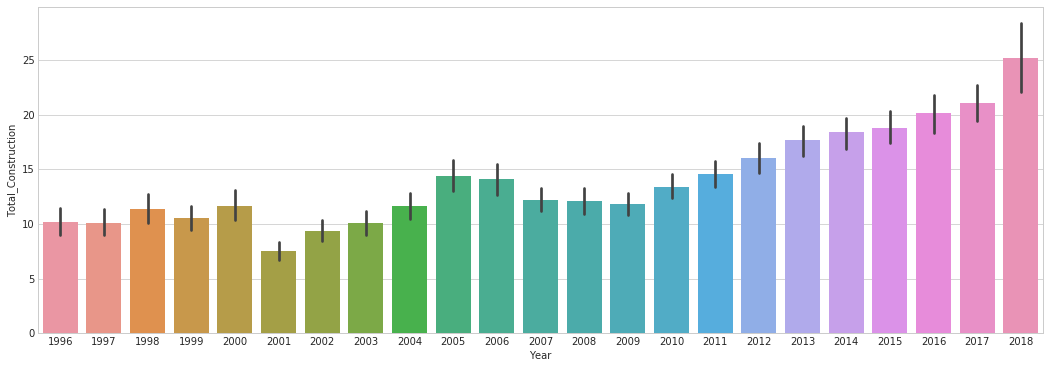

In [9]:
ffname = os.path.join(rootdir, "data", "int", "realestate_demographics.csv")
real_estate_info = pd.read_csv(ffname)
real_estate_info = real_estate_info.dropna(subset=["Total_NewConstructions", "Total_RemodelsRepairs"])

real_estate_info["Total_Construction"] = real_estate_info["Total_NewConstructions"] + real_estate_info["Total_RemodelsRepairs"]

fig, ax = plt.subplots(figsize=(18, 6))
_ =sns.barplot(x="Year", y="Total_Construction", data=real_estate_info, ax=ax)


# Top Five Most Expensive Neighborhoods 

The bar plots will help us visualize the diferent variables analized versus the median home value.
Analysis home value and construction dynamics within 5 most expensive/cheapest Neighborhoods:



<img src='files/reports/figures/barplot-5-most-expensive-neighborhood-2016.png' alt='drawing' height='1000px' width='1000px'/>

# Bottom Five Cheapest Neighborhoods 
The bar plots will help us visualize the diferent variables analized versus the median home value.
Analysis home value and construction dynamics within 5 most expensive/cheapest Neighborhoods:

<img src='files/reports/figures/barplot-5-cheapest-neighborhood-2016.png' alt='drawing' height='1000px' width='1000px'/>

In [10]:
import os, sys, inspect
import numpy as np
import matplotlib.pyplot as plt
# add parent dir to system dir
rootdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, rootdir)
sys.path.insert(0, rootdir)

from src.plot import bar
import pandas as pd

In [11]:
# Importing file
ffname = os.path.join(rootdir, "data", "int", "realestate_demographics.csv")
# Reading the file
realstate_df = pd.read_csv(ffname)

In [12]:
# set year to plot data
year = 2016
# set plot paramters
figsize = (80, 40)
titlefontsize = 80
ticklabelfontsize = 73
labelfontsize = 84
width = 0.18
dpi = 300
colors = ["maroon", "red", "orangered","tomato", "coral"]

In [13]:
bar_df = realstate_df[["Zip Code", "Year", "Month",
                       "Home Value Index",
                       "Total_NewConstructions",
                       "School Rating(GS)",
                       "Median Income (dollars)"]]
# month_select = 4
year_df = bar_df.loc[bar_df["Year"]==year]

# Group by zip code and year
gdf = year_df.groupby(["Year", "Zip Code"])
df = gdf.mean()
df = df.dropna() # drop nan values

df = df.sort_values(["Home Value Index"], ascending=False, inplace=False) # sort ascending
df = df.reset_index() 
df = df.iloc[0:5, :] # get five top
home_value = df["Home Value Index"]
tot_const = df["Total_NewConstructions"] #Because we got the mean of constructions and we need total
school_rating = df["School Rating(GS)"] #Because we got the mean of constructions and we need total
household_income = df["Median Income (dollars)"] #Because we got the mean of constructions and we need total


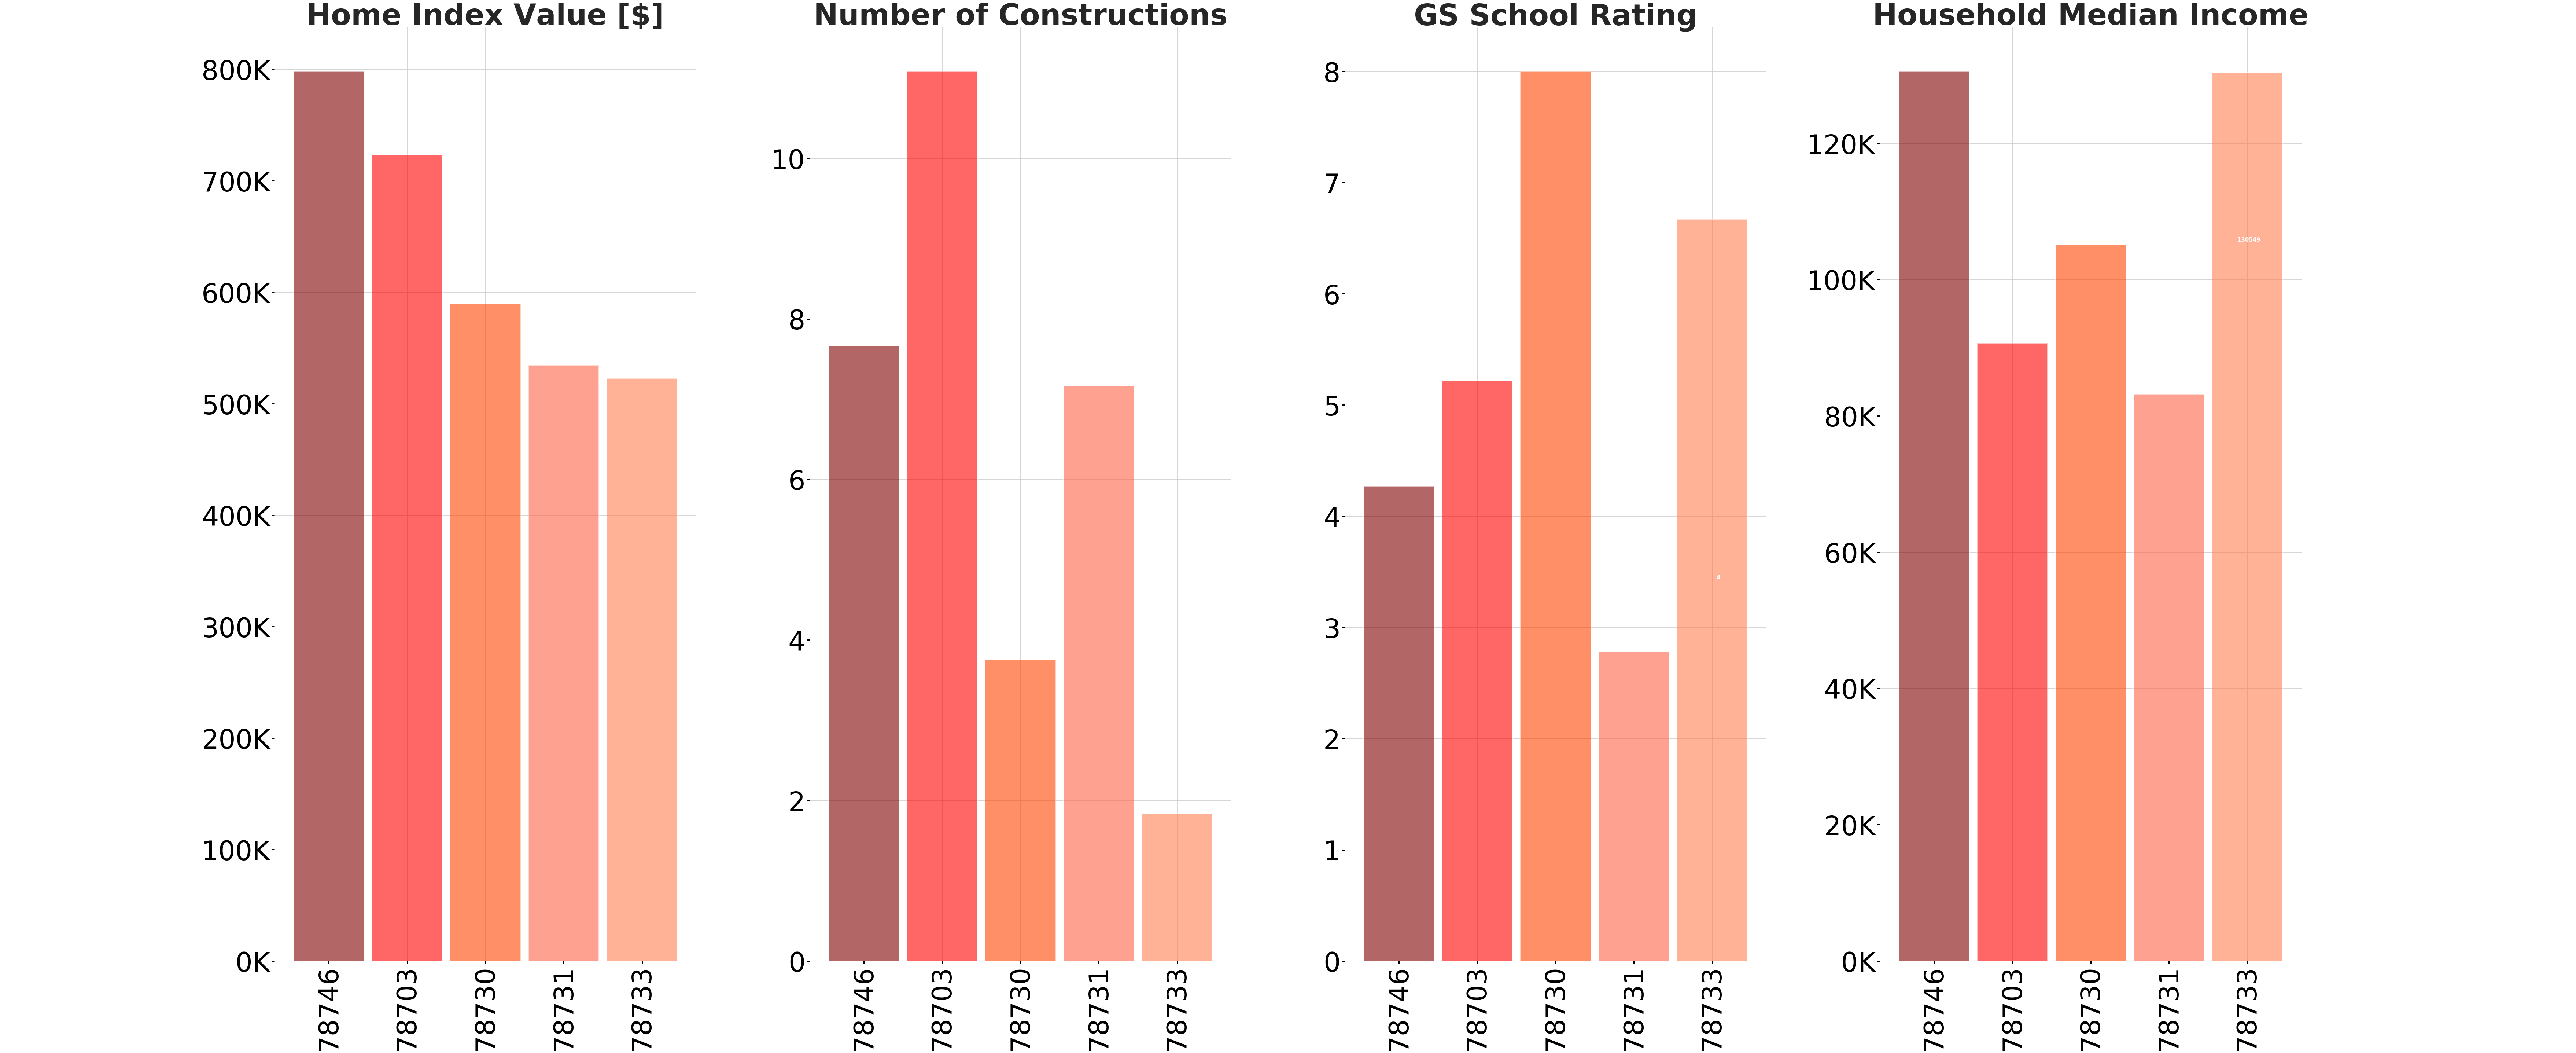

In [14]:
# plot bar charts 
labels = df["Zip Code"].values
x = np.arange(0, 1, 1/len(labels))

fig = plt.figure(figsize=figsize)
ax = fig.subplots(1, 4)
title = "Home Index Value [$]"
ylabel = None

i = 0
height = home_value
ax[i] = bar(
    height,
    x=x,
    color=colors,
    edgecolor="white",
    ticklabels=labels,
    ylabel=ylabel,
    title=title,
    titlefontsize=titlefontsize,
    width=width,
    xlabelfontsize=labelfontsize,
    ylabelfontsize=labelfontsize,
    xticklabelfontsize=ticklabelfontsize,
    yticklabelfontsize=ticklabelfontsize,
    topborder=False,
    leftborder=False,
    rightborder=False,
    xtickrotation=90,
    grid=False,
    ax=ax[i],)
yticks = ["{:3,.0f}K".format(elem) for elem in  ax[i].get_yticks()/1000]
ax[i].set_yticklabels(yticks)
fig.subplots_adjust(wspace=.00)

i = 1
title = "Number of Constructions"
height = tot_const
ax[i] = bar(
    height,
    x=x,
    color=colors,
    edgecolor="white",
    ticklabels=labels,
    ylabel=ylabel,
    title=title,
    titlefontsize=titlefontsize,
    width=width,
    xlabelfontsize=labelfontsize,
    ylabelfontsize=labelfontsize,
    xticklabelfontsize=ticklabelfontsize,
    yticklabelfontsize=ticklabelfontsize,
    topborder=False,
    leftborder=False,
    rightborder=False,
    xtickrotation=90,
    grid=False,
    ax=ax[i],)

i = 2
title = "GS School Rating"
height = school_rating
ax[i] = bar(
    height,
    x=x,
    color=colors,
    edgecolor="white",
    ticklabels=labels,
    ylabel=ylabel,
    title=title,
    titlefontsize=titlefontsize,
    width=width,
    xlabelfontsize=labelfontsize,
    ylabelfontsize=labelfontsize,
    xticklabelfontsize=ticklabelfontsize,
    yticklabelfontsize=ticklabelfontsize,
    topborder=False,
    leftborder=False,
    rightborder=False,
    xtickrotation=90,
    grid=False,
    ax=ax[i],)

i = 3
title = "Household Median Income"
height = household_income
ax[i] = bar(
    height,
    x=x,
    color=colors,
    edgecolor="white",
    ticklabels=labels,
    ylabel=ylabel,
    title=title,
    titlefontsize=titlefontsize,
    width=width,
    xlabelfontsize=labelfontsize,
    ylabelfontsize=labelfontsize,
    xticklabelfontsize=ticklabelfontsize,
    yticklabelfontsize=ticklabelfontsize,
    topborder=False,
    leftborder=False,
    rightborder=False,
    xtickrotation=90,
    grid=False,
    ax=ax[i],)
yticks = ["{:3,.0f}K".format(elem) for elem in  ax[i].get_yticks()/1000]
ax[i].set_yticklabels(yticks)
# fig.subplots_adjust(wspace=.00)
plt.savefig(os.path.join("reports", "figures", f"barplot-5-most-expensive-neighborhood-{year}.png"))

In [15]:
# set year to plot data
year = 2016
# set plot paramters
figsize = (80, 40)
titlefontsize = 80
ticklabelfontsize = 73
labelfontsize = 84
width = 0.18
dpi = 300
colors = ["Navy", "steelblue", "cadetblue", "powderblue", "lightblue"]

In [16]:
bar_df = realstate_df[["Zip Code", "Year", "Month",
                       "Home Value Index",
                       "Total_NewConstructions",
                       "School Rating(GS)",
                       "Median Income (dollars)"]]
# month_select = 4
year_df = bar_df.loc[bar_df["Year"]==year]

# Group by zip code and year
gdf = year_df.groupby(["Year", "Zip Code"])
df = gdf.mean()
df = df.dropna() # drop nan values

df = df.sort_values(["Home Value Index"], ascending=True, inplace=False) # sort descending
df = df.reset_index() 
df = df.iloc[0:5, :] # get five top
home_value = df["Home Value Index"]
tot_const = df["Total_NewConstructions"] #Because we got the mean of constructions and we need total
school_rating = df["School Rating(GS)"] #Because we got the mean of constructions and we need total
household_income = df["Median Income (dollars)"] #Because we got the mean of constructions and we need total


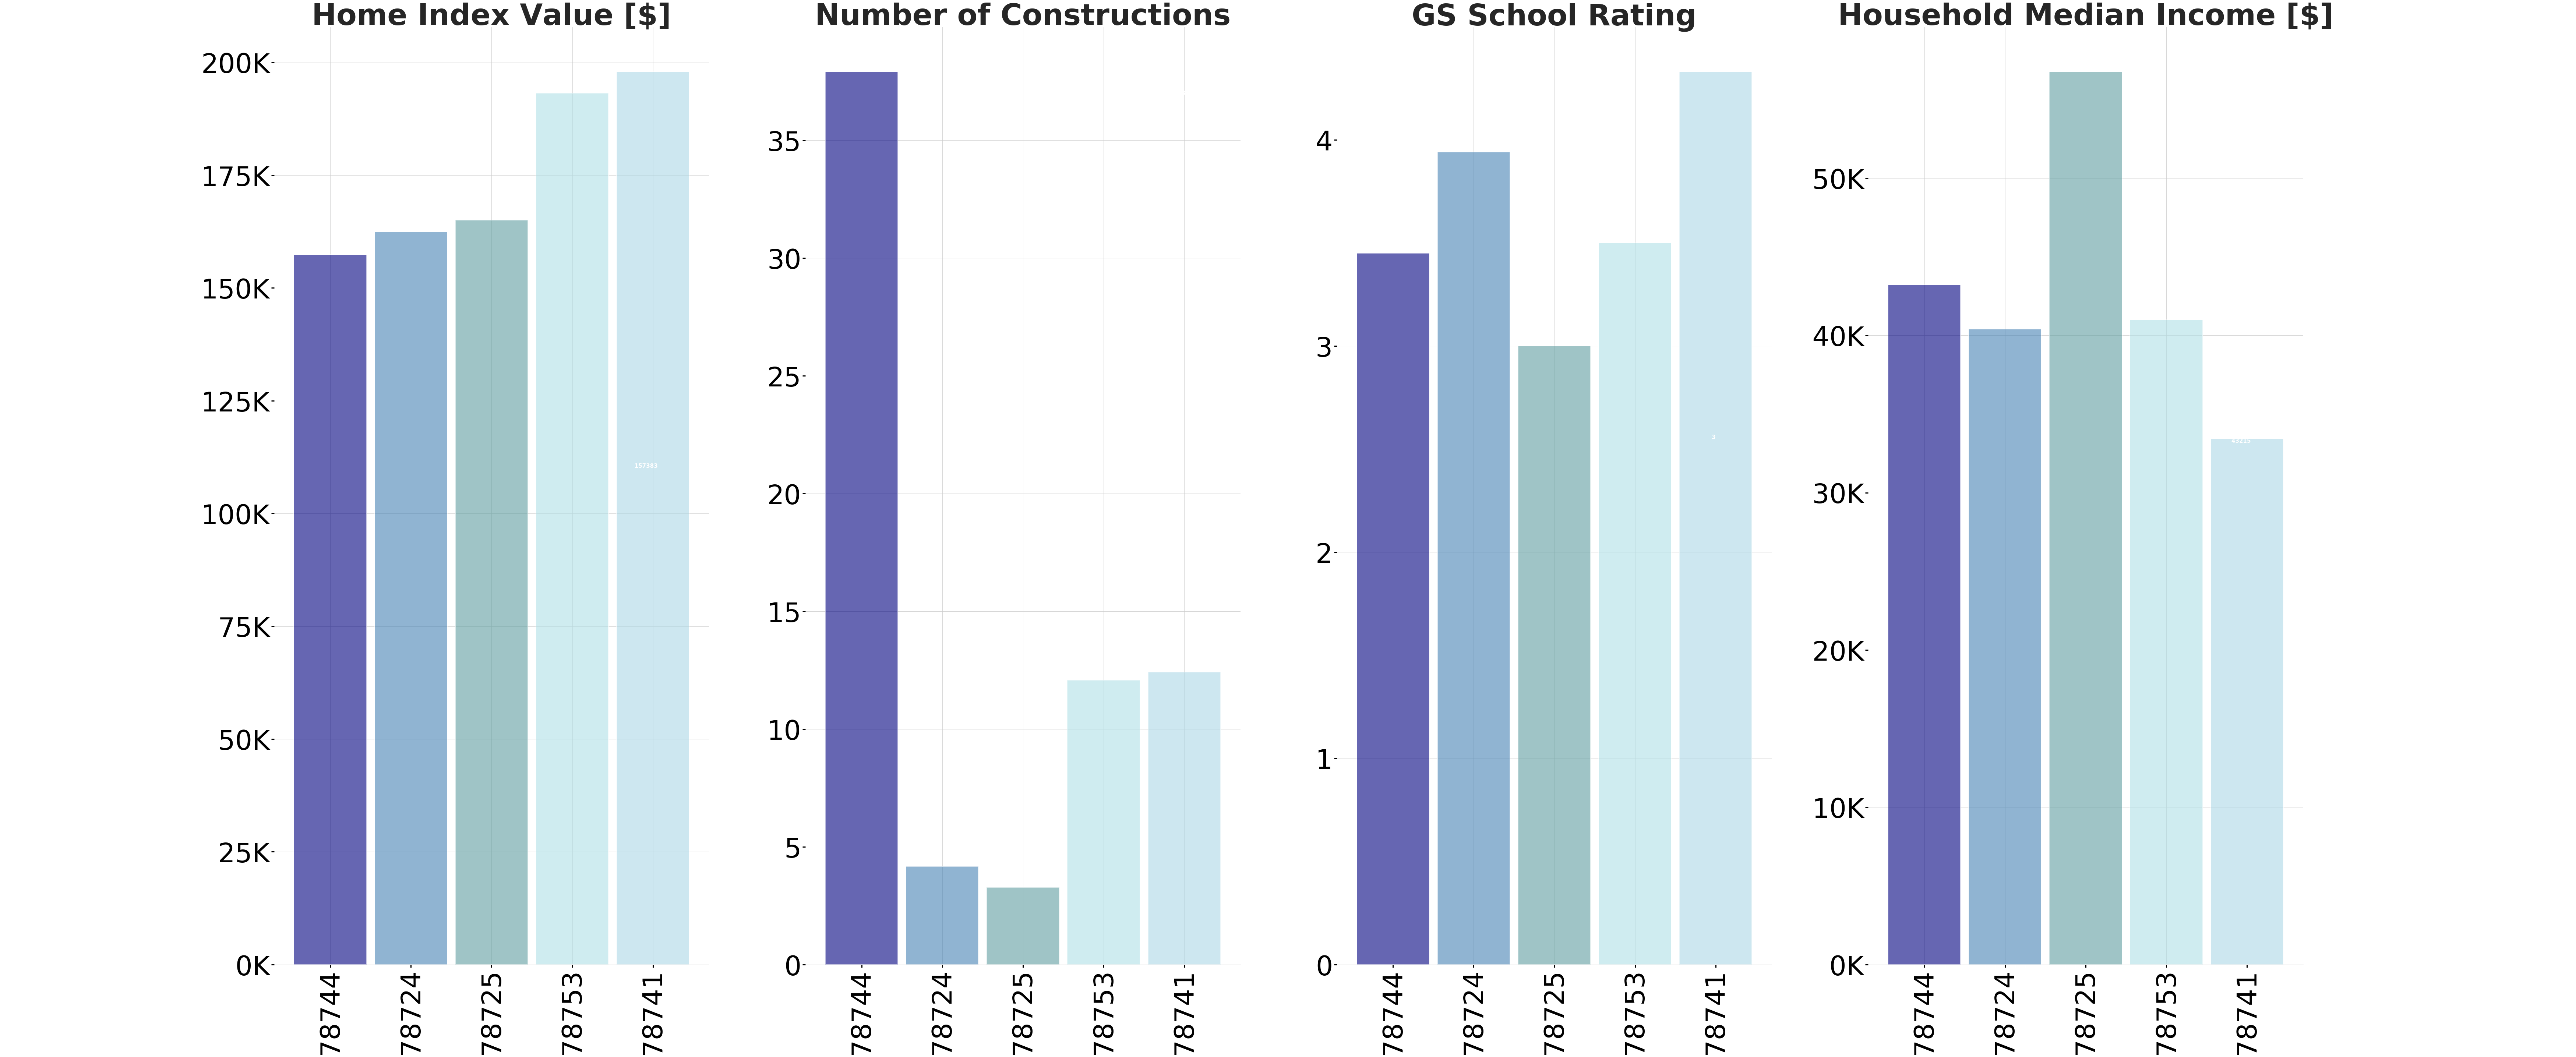

In [17]:
# plot bar charts 
labels = df["Zip Code"].values
x = np.arange(0, 1, 1/len(labels))

fig = plt.figure(figsize=figsize)
ax = fig.subplots(1, 4)
title = "Home Index Value [$]"
ylabel = None

i = 0
height = home_value
ax[i] = bar(
    height,
    x=x,
    color=colors,
    edgecolor="white",
    ticklabels=labels,
    ylabel=ylabel,
    title=title,
    titlefontsize=titlefontsize,
    width=width,
    xlabelfontsize=labelfontsize,
    ylabelfontsize=labelfontsize,
    xticklabelfontsize=ticklabelfontsize,
    yticklabelfontsize=ticklabelfontsize,
    topborder=False,
    leftborder=False,
    rightborder=False,
    xtickrotation=90,
    grid=False,
    ax=ax[i],)
yticks = ["{:3,.0f}K".format(elem) for elem in  ax[i].get_yticks()/1000]
ax[i].set_yticklabels(yticks)
fig.subplots_adjust(wspace=.00)

i = 1
title = "Number of Constructions"
height = tot_const
ax[i] = bar(
    height,
    x=x,
    color=colors,
    edgecolor="white",
    ticklabels=labels,
    ylabel=ylabel,
    title=title,
    titlefontsize=titlefontsize,
    width=width,
    xlabelfontsize=labelfontsize,
    ylabelfontsize=labelfontsize,
    xticklabelfontsize=ticklabelfontsize,
    yticklabelfontsize=ticklabelfontsize,
    topborder=False,
    leftborder=False,
    rightborder=False,
    xtickrotation=90,
    grid=False,
    ax=ax[i],)

i = 2
title = "GS School Rating"
height = school_rating
ax[i] = bar(
    height,
    x=x,
    color=colors,
    edgecolor="white",
    ticklabels=labels,
    ylabel=ylabel,
    title=title,
    titlefontsize=titlefontsize,
    width=width,
    xlabelfontsize=labelfontsize,
    ylabelfontsize=labelfontsize,
    xticklabelfontsize=ticklabelfontsize,
    yticklabelfontsize=ticklabelfontsize,
    topborder=False,
    leftborder=False,
    rightborder=False,
    xtickrotation=90,
    grid=False,
    ax=ax[i],)

i = 3
title = "Household Median Income [$]"
height = household_income
ax[i] = bar(
    height,
    x=x,
    color=colors,
    edgecolor="white",
    ticklabels=labels,
    ylabel=ylabel,
    title=title,
    titlefontsize=titlefontsize,
    width=width,
    xlabelfontsize=labelfontsize,
    ylabelfontsize=labelfontsize,
    xticklabelfontsize=ticklabelfontsize,
    yticklabelfontsize=ticklabelfontsize,
    topborder=False,
    leftborder=False,
    rightborder=False,
    xtickrotation=90,
    grid=False,
    ax=ax[i],)
yticks = ["{:3,.0f}K".format(elem) for elem in  ax[i].get_yticks()/1000]
ax[i].set_yticklabels(yticks)
# fig.subplots_adjust(wspace=.00)

plt.savefig(os.path.join("reports", "figures", f"barplot-5-cheapest-neighborhood-{year}.png"))

# House Price Prediction

As an Austinite home buyer dreaming for her or his dream house, get an estimate of future house value a paricular zipcode in Austin. 

## Data descriptors
With 15 explanatory variables each having influence on house price market predict home value in 'Median Price per Sqft.'  in Austin, Texas.

1. Home Value Index
2. Median Listing Price Per sqf
3. Median Listing Price
4. Median Price Cut
5. Median Price of Reduction
6. Median Rental Price
7. Inventory Measure
8. Sales
9. Mortgage Rate_15
10. Mortgage Rate_30
11. Total_NewConstructions
12. Total_RemodelsRepairs
13. TotalCost_NewConstructions
14. Median Income (dollars)
15. Number of Households

## Examine Data

* Identify variable wih missing (nan) values
* Identify zipcodes not having historical data
* Visually verify for any patterns along time trends

In [18]:
import pandas as pd
import numpy as np
import os, sys, inspect
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# add parent dir to system dir
rootdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, rootdir)
mpl.style.use("seaborn")
from src.utils import get_temporal_data, get_spatial_data
from src.utils import create_difference_sequence

In [19]:
ffname_realestate = os.path.join(rootdir, "data", "int", "realestate_demographics.csv")
realestate_df = pd.read_csv(ffname_realestate)

ffname_zipcodes = os.path.join(rootdir, "data", "int", "zip_codes.csv")
zipcode_df = pd.read_csv(ffname_zipcodes)

In [20]:
period = [1996, 2017]
figsize = (15, 30)
titlefontsize = 20
xtickfontsize = 17
ytickfontsize = 17
legendfontsize = 19

columns = ["Home Value Index",
           "Median Listing Price Per sqf",
           "Median Listing Price",
           "Median Price Cut",
           "Median Price of Reduction",
           "Median Rental Price",
           "Inventory Measure",
           "Sales",
           "Mortgage Rate_15",
           "Mortgage Rate_30",
           "Total_NewConstructions",
           "Total_RemodelsRepairs",
           "TotalCost_NewConstructions",
           "Median Income (dollars)",
           "Number of Households",]

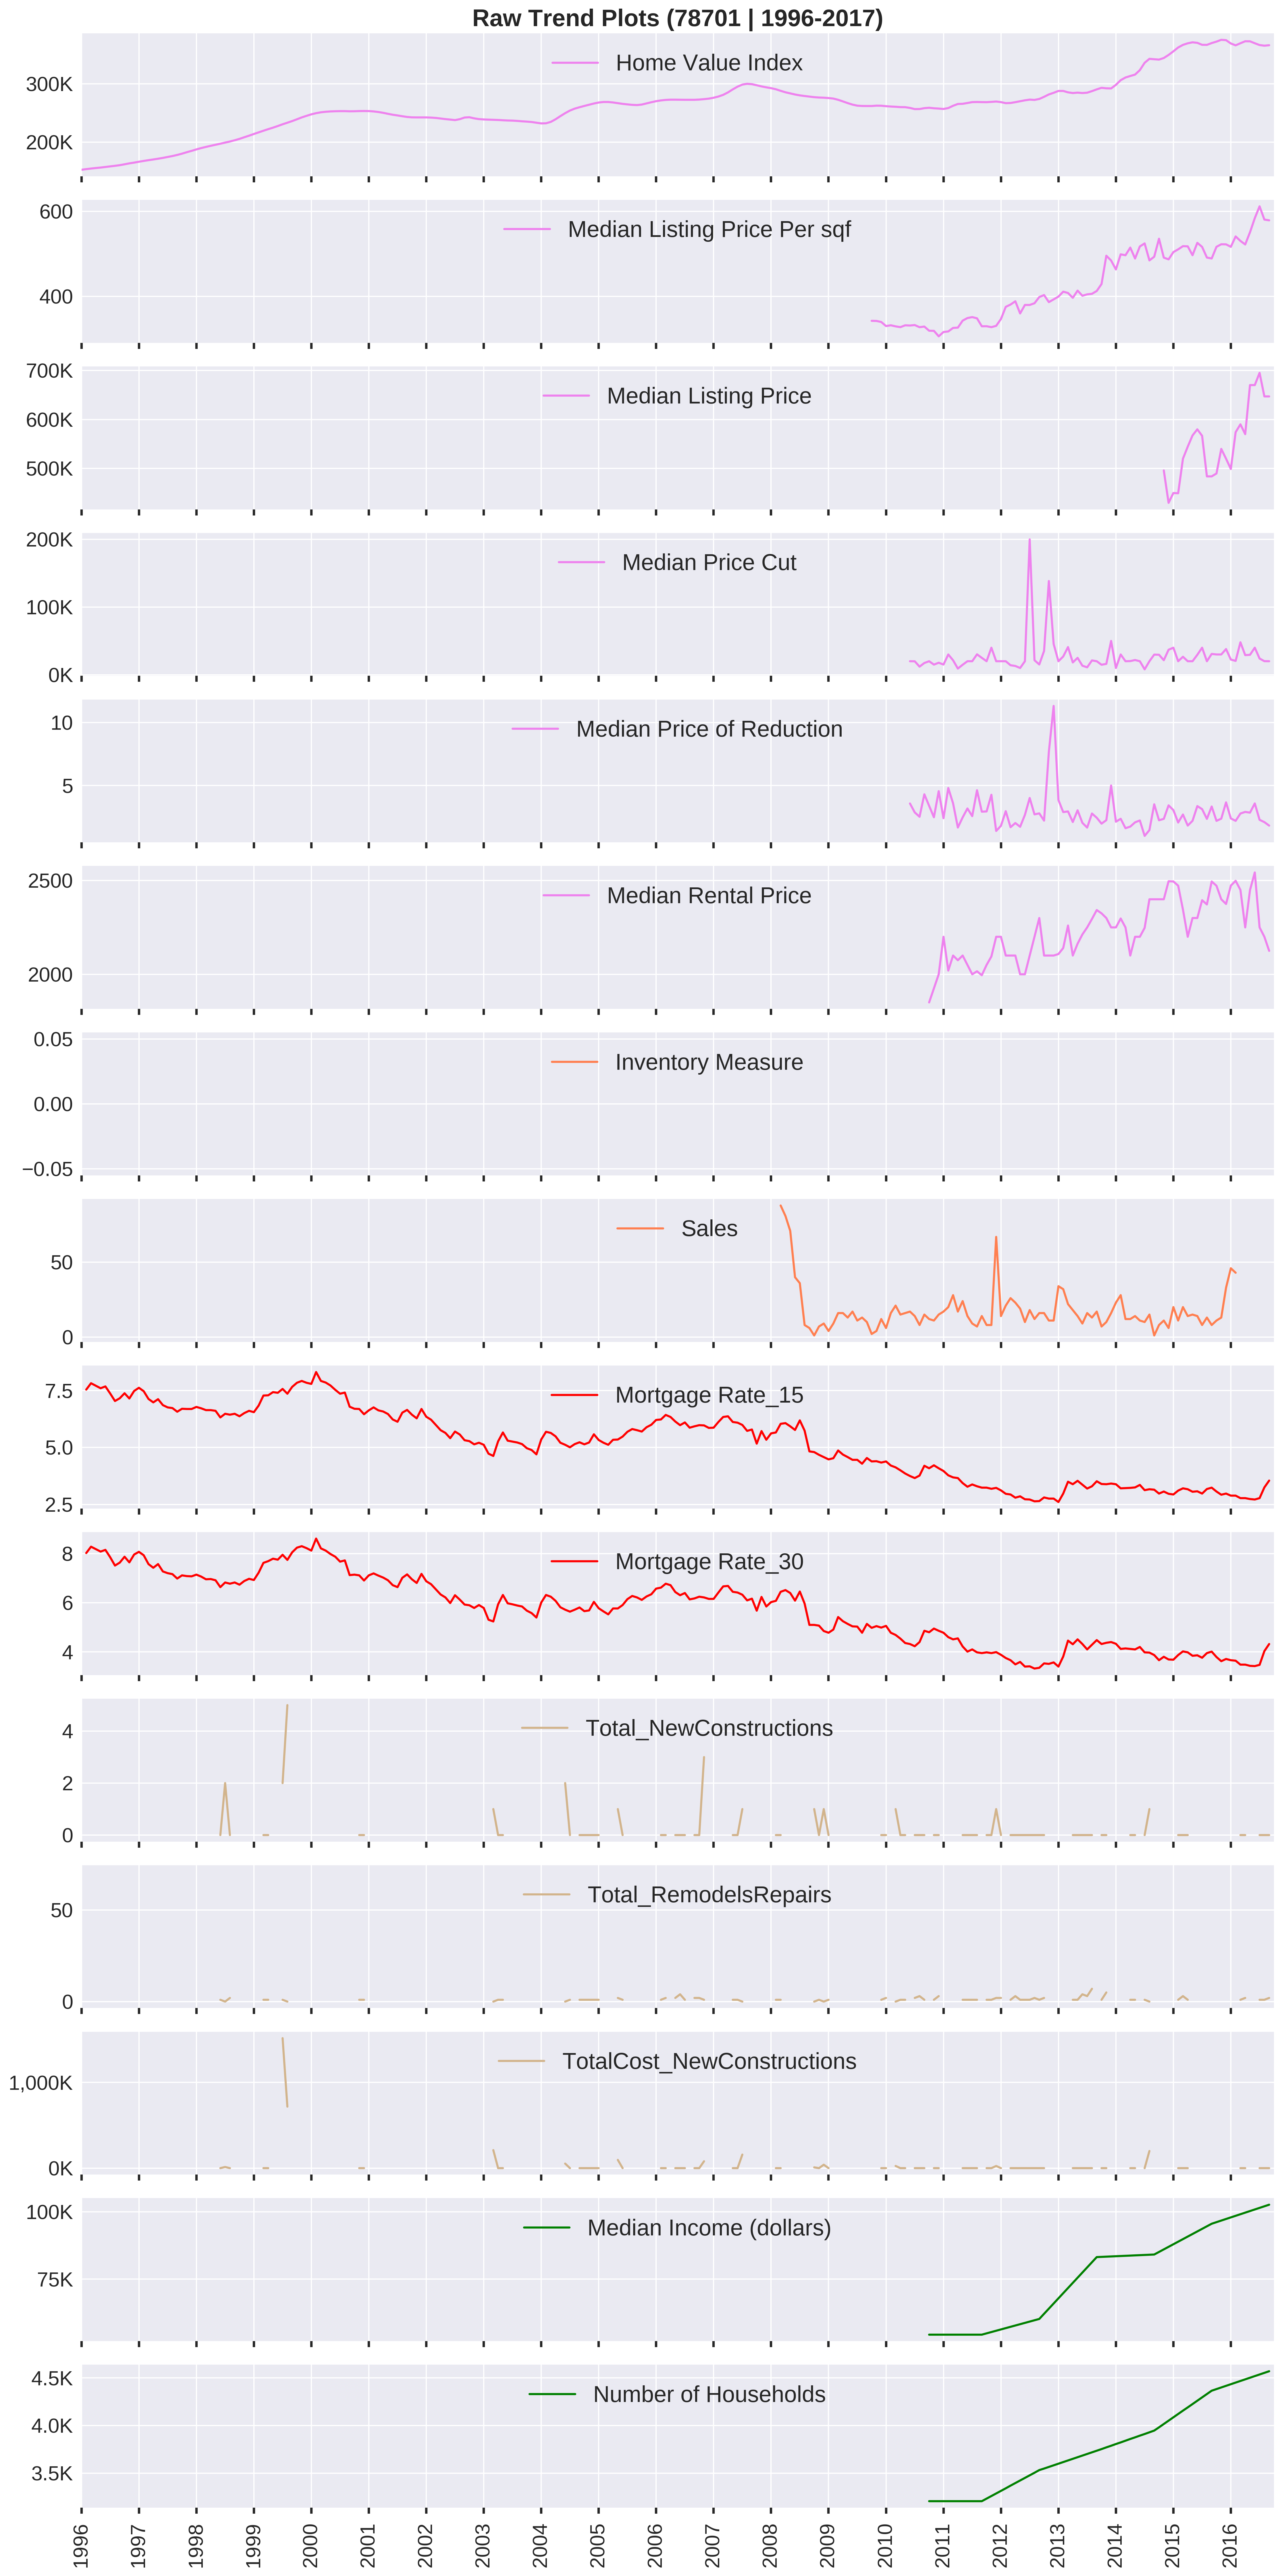

In [21]:
i = 0
row = zipcode_df.iloc[i, :]
zipcode = row["Zip Code"]

df = get_temporal_data(zipcode, realestate_df)
df = df[(df["Year"] >= period[0]).values &  (df["Year"] < period[1]).values]

time_stamp = df[["Year", "Month"]].astype(str).apply(lambda x: "-".join(x), axis=1)
time_stamp = df["Year"].astype(str)

fig = plt.figure(figsize=figsize, dpi=dpi)
ax = fig.subplots(len(columns), 1)

for i, column in enumerate(columns):

    if column in [
        "Home Value Index",
        "Median Listing Price Per sqf",
        "Median Listing Price",
        "Median Price Cut",
        "Median Price of Reduction",
        "Median Rental Price",]:
        color = "violet"
    elif column in [
        "Inventory Measure",
        "Sales",]:
        color = "coral"
    elif column in [
        "Mortgage Rate_15",
        "Mortgage Rate_30",]:
        color = "red"
    elif column in [
        "Total_NewConstructions",
        "Total_RemodelsRepairs",
        "TotalCost_NewConstructions",]:
        color = "tan"
    elif column in [
        "Median Income (dollars)",
        "Number of Households",]:
        color = "green"

    ax[i].plot(np.arange(0, df.shape[0]), df[column].values, color=color, label=column)
    ax[i].set_xlim([0, df.shape[0]])
    ax[i].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False,  # # labels along the bottom edge are off
        length=5,
        width=2,
    )
    ax[i].tick_params(
        axis='y',    
        labelsize=ytickfontsize)

    if column in ["Home Value Index", "Median Listing Price", "TotalCost_NewConstructions",
                  "Median Income (dollars)", "Median Price Cut",]:
        yticks_ = ["{:3,.0f}K".format(elem) for elem in  ax[i].get_yticks()/1000]
        ax[i].set_yticklabels(yticks_)

    if column in ["Number of Households"]:
        yticks_ = ["{:2.1f}K".format(elem) for elem in  ax[i].get_yticks()/1000]
        ax[i].set_yticklabels(yticks_)
    ax[i].set_xticks(np.arange(0, df.shape[0])[::12])

#     ax[i].grid(True, 'major', color='snow', linestyle='-', linewidth=0.5, axis="y")
#     ax[i].grid(True, 'minor', color='snow', linestyle='-', linewidth=0.5, axis="y")
#     ax[i].patch.set_facecolor('gainsboro')
    ax[i].legend(loc="upper center", fontsize=legendfontsize, framealpha=0.1)

ax[i].set_xticks(np.arange(0, df.shape[0])[::12])
ax[i].set_xticklabels(time_stamp[::12], rotation=90)
ax[i].tick_params(
        axis='x',          
        which='both',      
        bottom=True, 
        top=False,   
        labelbottom=True,
        labelsize=xtickfontsize)
ax[i].tick_params(
        axis='y',    
        which='both',
        right=True,
        left=True,
        labelsize=ytickfontsize)

ax[0].set_title(f"Raw Trend Plots ({zipcode} | {period[0]}-{period[1]})",
    fontsize=titlefontsize,
    fontweight="bold"
)
fig.subplots_adjust(hspace=.01)
plt.tight_layout()

plt.show()

## Preprocess Data

### Data descriptors Used in Modeling
1. Median Listing Price Per sqf
2. Median Price Cut
3. Median Price of Reduction
4. Inventory Measure
5. Mortgage Rate_15
6. Mortgage Rate_30
7. Total_NewConstructions
8. Total_RemodelsRepairs

### Zip Codes Used in Modeling
1. 78703
2. 78704
3. 78717
4. 78726
5. 78731,
6. 78746
7. 78747
8. 78748
9. 78750
10. 78753

In [22]:
import pandas as pd
import numpy as np
import os, sys, inspect
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# add parent dir to system dir
rootdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, rootdir)
mpl.style.use("seaborn")
from src.utils import get_temporal_data, get_spatial_data
from src.utils import create_difference_sequence
from src.utils import series_to_supervised

Using TensorFlow backend.


In [23]:
period = [2011, 2017]
# 
# set plot params
figsize = (15, 30)
titlefontsize = 20
xtickfontsize = 17
ytickfontsize = 17
legendfontsize = 19

columns = ["Median Listing Price Per sqf",
           "Median Price Cut",
           "Median Price of Reduction",
           "Inventory Measure",
           "Mortgage Rate_15",
           "Mortgage Rate_30",
           "Total_NewConstructions",
           "Total_RemodelsRepairs",]
zipcodes = [78703, 78704, 78717, 78726, 78731,
            78746, 78747, 78748, 78750, 78753]

In [24]:
ffname_realestate = os.path.join(rootdir, "data", "int", "realestate_demographics.csv")
realestate_df = pd.read_csv(ffname_realestate)

ffname_zipcodes = os.path.join(rootdir, "data", "int", "zip_codes.csv")
zipcode_df = pd.read_csv(ffname_zipcodes)

In [25]:
# preprcess data: trim and fill
df = pd.DataFrame()
for i, zipcode in enumerate(zipcodes):
    print(f"ploting processed trends for {zipcode}...", end="")
    zipcode_df = get_temporal_data(zipcode, realestate_df)
    zipcode_df = zipcode_df[["Zip Code", "Year", "Month"] + columns] 
    zipcode_df = zipcode_df[(zipcode_df["Year"] >= period[0]).values &
                            (zipcode_df["Year"] < period[1]).values]
    # fill missing values with previous enteires
    zipcode_df.fillna(method='ffill', inplace=True)
    
    time_stamp = zipcode_df[["Year", "Month"]].astype(str).apply(lambda x: "-".join(x), axis=1)
    time_stamp = zipcode_df["Year"].astype(str)
    
    # get all zipcode values
    df = df.append(zipcode_df, ignore_index=False)
#     data = np.concatenate(data, zipcode_df[columns].values)
    
    
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.subplots(len(columns), 1)

    for i, column in enumerate(columns):

        if column in [
            "Home Value Index",
            "Median Listing Price Per sqf",
            "Median Listing Price",
            "Median Price Cut",
            "Median Price of Reduction",
            "Median Rental Price",]:
            color = "violet"
        elif column in [
            "Inventory Measure",
            "Sales",]:
            color = "coral"
        elif column in [
            "Mortgage Rate_15",
            "Mortgage Rate_30",]:
            color = "red"
        elif column in [
            "Total_NewConstructions",
            "Total_RemodelsRepairs",
            "TotalCost_NewConstructions",]:
            color = "tan"
        elif column in [
            "Median Income (dollars)",
            "Number of Households",]:
            color = "green"

        ax[i].plot(np.arange(0, zipcode_df.shape[0]), zipcode_df[column].values, color=color, label=column)
        ax[i].set_xlim([0, zipcode_df.shape[0]])
        ax[i].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False,  # # labels along the bottom edge are off
            length=5,
            width=2,
        )
        ax[i].tick_params(
            axis='y',    
            labelsize=ytickfontsize)

        if column in ["Home Value Index", "Median Listing Price", "TotalCost_NewConstructions",
                      "Median Income (dollars)", "Median Price Cut",]:
            yticks_ = ["{:3,.0f}K".format(elem) for elem in  ax[i].get_yticks()/1000]
            ax[i].set_yticklabels(yticks_)

        if column in ["Number of Households"]:
            yticks_ = ["{:2.1f}K".format(elem) for elem in  ax[i].get_yticks()/1000]
            ax[i].set_yticklabels(yticks_)
        ax[i].set_xticks(np.arange(0, zipcode_df.shape[0])[::12])

    #     ax[i].grid(True, 'major', color='snow', linestyle='-', linewidth=0.5, axis="y")
    #     ax[i].grid(True, 'minor', color='snow', linestyle='-', linewidth=0.5, axis="y")
    #     ax[i].patch.set_facecolor('gainsboro')
        ax[i].legend(loc="upper center", fontsize=legendfontsize, framealpha=0.1)

    ax[i].set_xticks(np.arange(0, zipcode_df.shape[0])[::12])
    ax[i].set_xticklabels(time_stamp[::12], rotation=90)
    ax[i].tick_params(
            axis='x',          
            which='both',      
            bottom=True, 
            top=False,   
            labelbottom=True,
            labelsize=xtickfontsize)
    ax[i].tick_params(
            axis='y',    
            which='both',
            right=True,
            left=True,
            labelsize=ytickfontsize)

    ax[0].set_title(f"Raw Trend Plots ({zipcode} | {period[0]}-{period[1]})",
        fontsize=titlefontsize,
        fontweight="bold"
    )
    fig.subplots_adjust(hspace=.01)
    plt.tight_layout()
    fname = f"trend-plot-processed-{period[0]}-{period[1]}-{zipcode}.png"
    fig.savefig(os.path.join(rootdir, "reports", "figures", fname), transparent=False, dpi=dpi)
    plt.close(fig)
    print("completed.")

ploting processed trends for 78703...completed.
ploting processed trends for 78704...completed.
ploting processed trends for 78717...completed.
ploting processed trends for 78726...completed.
ploting processed trends for 78731...completed.
ploting processed trends for 78746...completed.
ploting processed trends for 78747...completed.
ploting processed trends for 78748...completed.
ploting processed trends for 78750...completed.
ploting processed trends for 78753...completed.


## Prepare Data
1. Rescale to [0, 1]
2. Reframe data as suitable for sequential data supervised training
3. Divide data into train and validation sets
4. Reformat data as required by Kera-Tensorflow LTSM model 

In [26]:
# set model parameters
index_target = 0

n_lags = 2
n_sequences = 1
n_train = 9 * 70
n_units = 30

# set train parameters
optimizer = "adam"
loss = "mse"
n_epochs = 50
sz_batch = 10
verbose = 1

In [27]:
# rescale data to [0, 1]
values = df[columns].values
values = values.astype("float32")
scaler = MinMaxScaler(feature_range=(0, 1))
values_scaled = scaler.fit_transform(values)
n_variables = values.shape[1]

In [28]:
# reframe data to supervised learning
reframed_df = pd.DataFrame()
for zipcode in zipcodes:
    value_scaled = values_scaled[df["Zip Code"] == zipcode, :]
    reframed_df = reframed_df.append(
        series_to_supervised(value_scaled, n_lags, n_sequences), ignore_index=False)

In [29]:
# create train/valid data
# split into train and test sets
values = reframed_df.values
train_values, valid_values = values[:n_train, :], values[n_train:, :]

In [30]:
# split into input and targets
n_train = train_values.shape[0]
n_valid = valid_values.shape[0]
n_observations = n_lags * n_variables
x_train, y_train = train_values[:, :n_observations], train_values[:, n_observations+index_target:n_train:n_variables]
x_valid, y_valid = valid_values[:, :n_observations], valid_values[:, n_observations+index_target:n_valid:n_variables]
print(f"Train Inputs Shape: {x_train.shape}, Train Targets Shape: {y_train.shape}")
print(f"Valid Inputs Shape: {x_valid.shape}, Valid Targets Shape: {y_valid.shape}")

Train Inputs Shape: (630, 16), Train Targets Shape: (630, 1)
Valid Inputs Shape: (70, 16), Valid Targets Shape: (70, 1)


In [31]:
# reshape data as required by ltsm
x_train = x_train.reshape((n_train, n_lags, n_variables))
x_valid = x_valid.reshape((n_valid, n_lags, n_variables))
print(f"Train Inputs Shape: {x_train.shape}, Train Targets Shape: {y_train.shape}")
print(f"Valid Inputs Shape: {x_valid.shape}, Valid Targets Shape: {y_valid.shape}")

Train Inputs Shape: (630, 2, 8), Train Targets Shape: (630, 1)
Valid Inputs Shape: (70, 2, 8), Valid Targets Shape: (70, 1)


## Build Model
1. Model: [Long-Term-Short-Memory (LTSM)](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
2. Single Lear
3. Number of units: 30
4. Number of Lags: 2
5. Number of sequences: 1
<img src='files/reports/figures/ltsm-chain.png' alt='drawing' height='1000px' width='1000px'/>

In [32]:
# build model
model = Sequential()
model.add(LSTM(n_units, input_shape=(n_lags, n_variables)))
model.add(Dense(n_sequences))

## Train Model
1. Optimization: Mini-batch Stochastic Gradient Descent (SGD)
2. Update rule: ADAM
3. Loss Function: Mean Squred Error (MSE)
4. Number ot Epochs: 50
5. Batch Size: 10

<img src='files/reports/figures/loss-plot-valid.png' alt='drawing' height='1000px' width='1000px'/>

In [33]:
model.compile(loss=loss, optimizer=optimizer)
# train model
history = model.fit(x_train, y_train,
                    epochs=n_epochs,
                    batch_size=sz_batch,
                    validation_data=(x_valid, y_valid),
                    verbose=verbose,
                    shuffle=False)

Train on 630 samples, validate on 70 samples
Epoch 1/50
630/630 [==============================] - 1s 1ms/step - loss: 0.0623 - val_loss: 0.0246
Epoch 2/50
630/630 [==============================] - 0s 288us/step - loss: 0.0229 - val_loss: 0.0115
Epoch 3/50
630/630 [==============================] - 0s 367us/step - loss: 0.0127 - val_loss: 0.0055
Epoch 4/50
630/630 [==============================] - 0s 384us/step - loss: 0.0066 - val_loss: 0.0035
Epoch 5/50
630/630 [==============================] - 0s 368us/step - loss: 0.0039 - val_loss: 0.0027
Epoch 6/50
630/630 [==============================] - 0s 385us/step - loss: 0.0029 - val_loss: 0.0021
Epoch 7/50
630/630 [==============================] - 0s 399us/step - loss: 0.0024 - val_loss: 0.0017
Epoch 8/50
630/630 [==============================] - 0s 407us/step - loss: 0.0021 - val_loss: 0.0014
Epoch 9/50
630/630 [==============================] - 0s 401us/step - loss: 0.0018 - val_loss: 0.0012
Epoch 10/50
630/630 [==================

## Validate Model
*  10-fold Validation


<img src='files/reports/figures/trend-plot-predict-2011-2017-78753.png' alt='drawing' height='1000px' width='1000px'/>

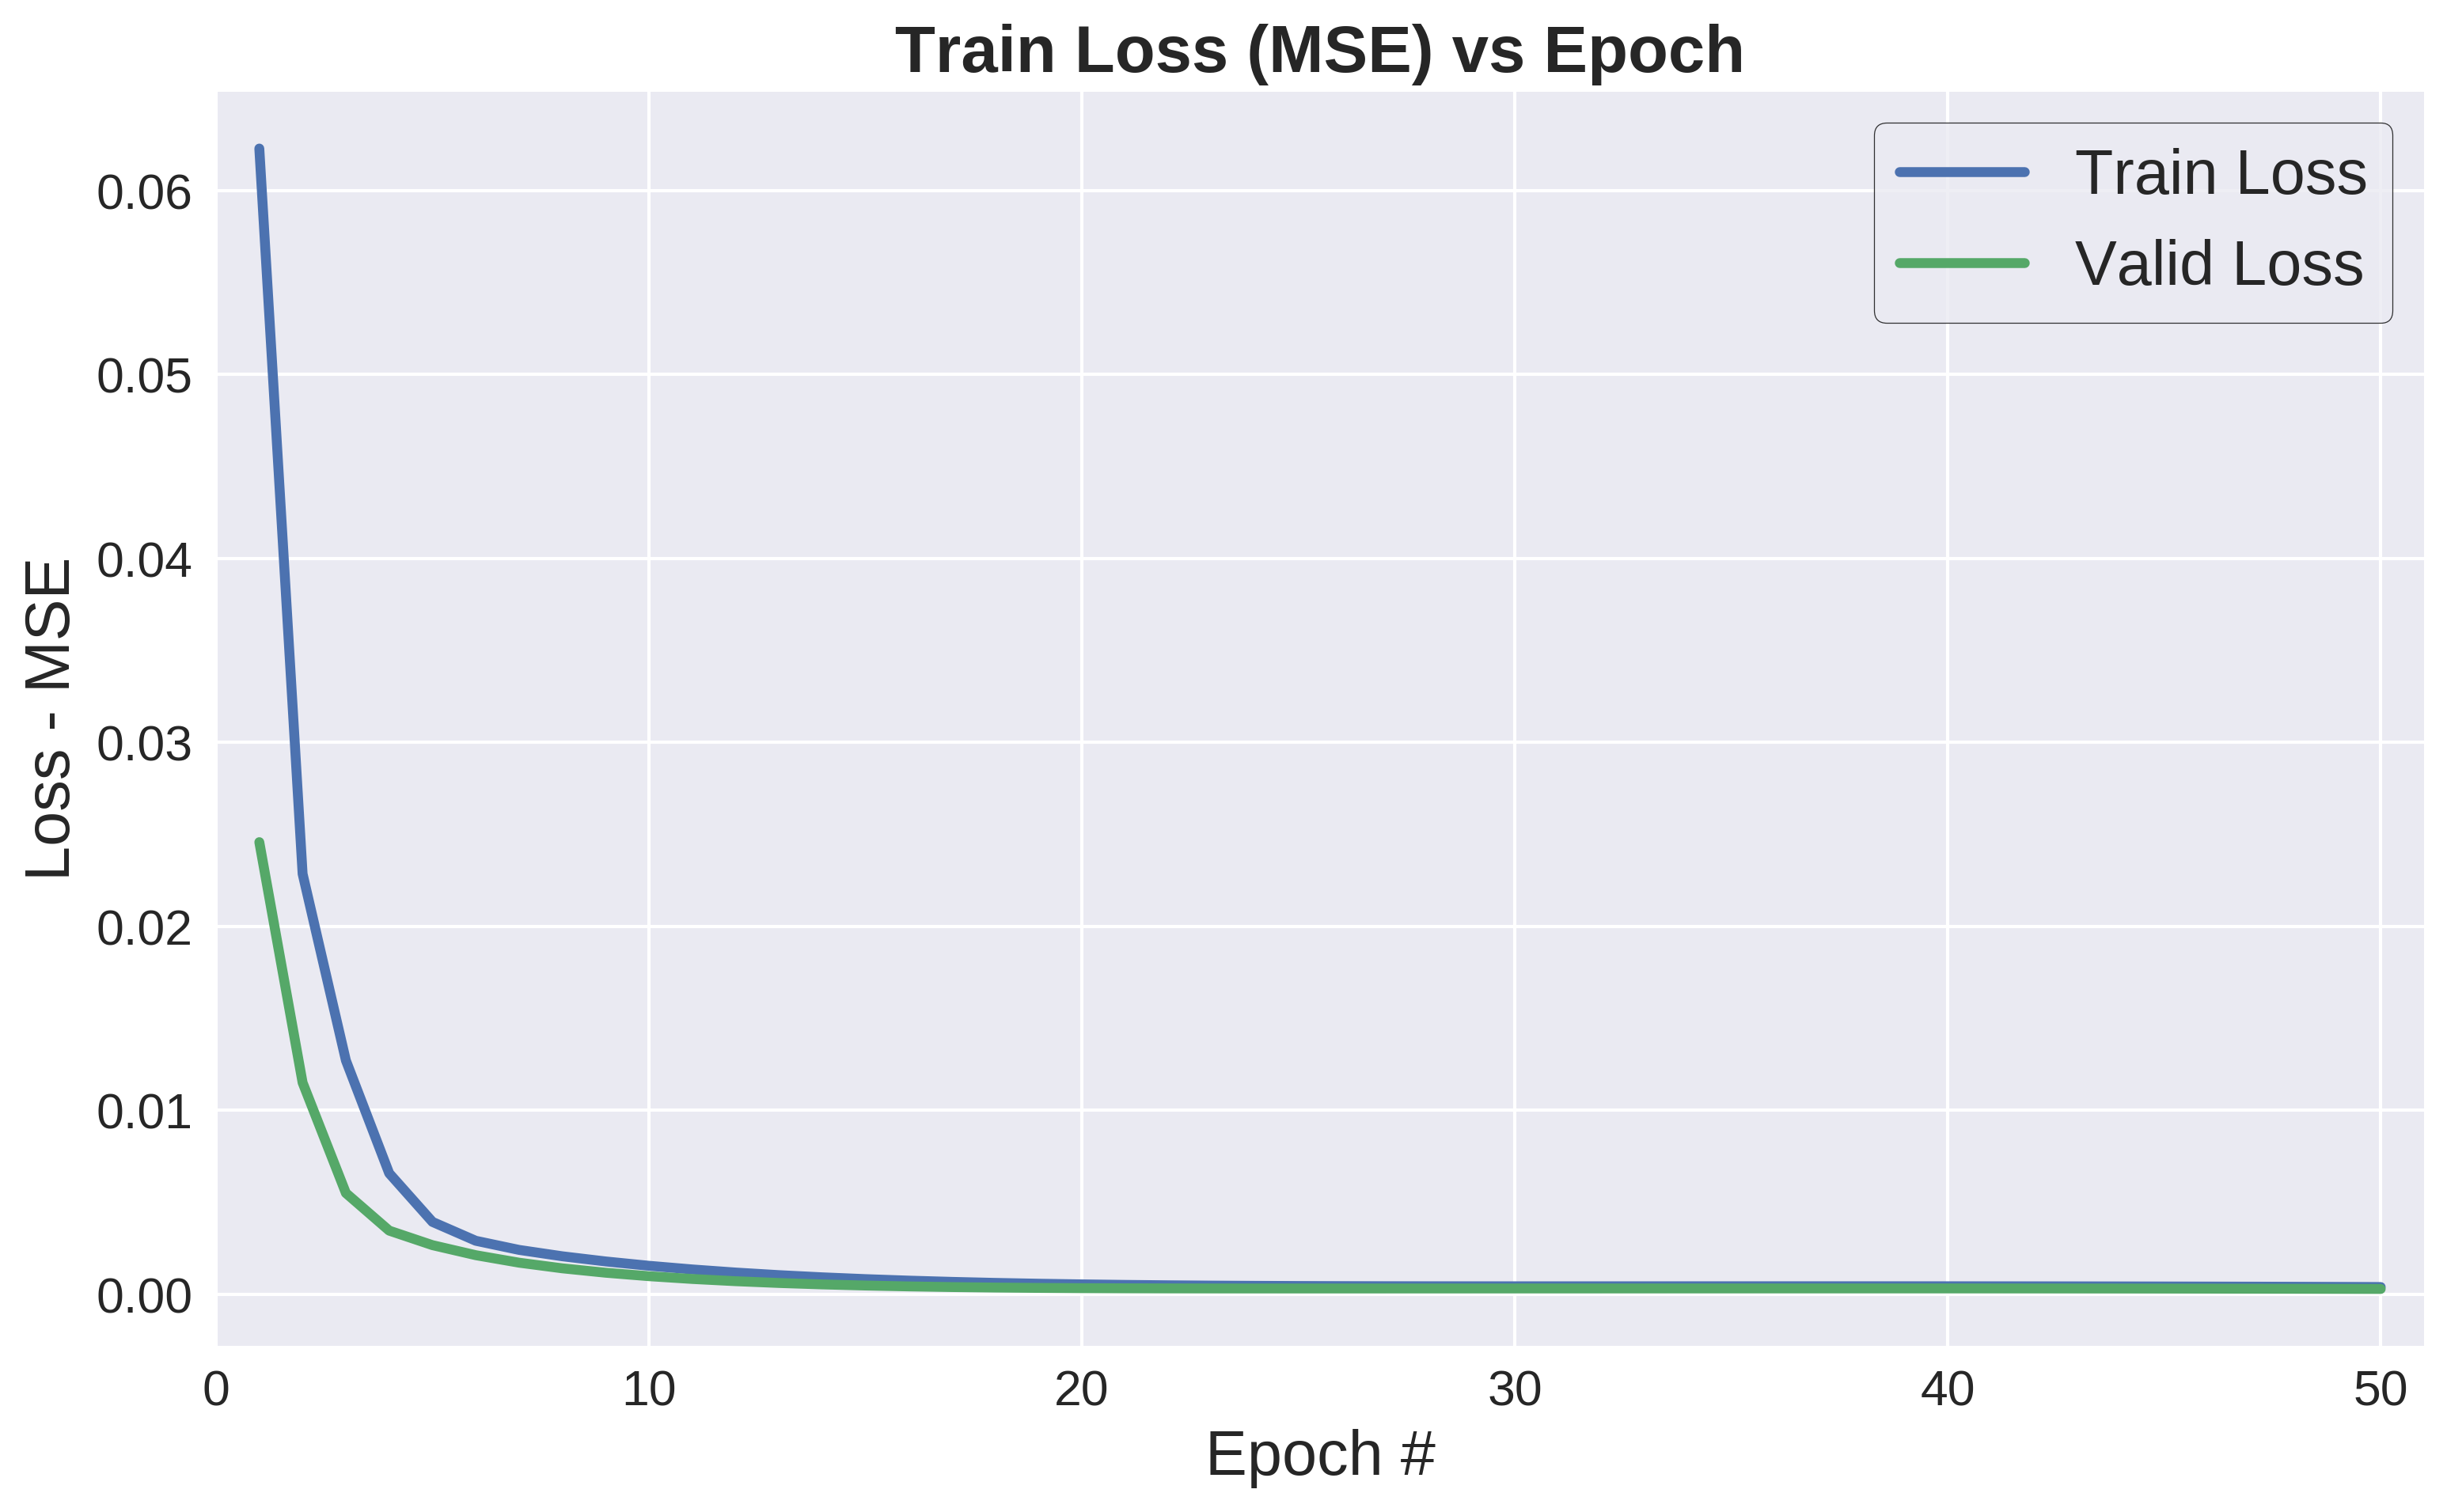

In [34]:
# plot history
figsize = (12, 7)
titlefontsize = 20
xtickfontsize = 15
ytickfontsize = 15
labelfontsize = 19
legendfontsize = 19
linewidth = 3
fig = plt.figure(figsize=figsize, dpi=dpi)
ax = fig.subplots(1, 1)
ax.plot(np.arange(1, n_epochs+1), history.history['loss'],
        "-",
        linewidth=linewidth,
        label='Train Loss')
ax.plot(np.arange(1, n_epochs+1), history.history['val_loss'],
        "-",
        linewidth=linewidth,
        label='Valid Loss')
ax.set_xlabel("Epoch #", fontsize=labelfontsize)
ax.set_ylabel("Loss - " + loss.upper(), fontsize=labelfontsize)
ax.tick_params(
    axis='x',          
    which='both',      
    labelsize=xtickfontsize)
ax.tick_params(
    axis='y',    
    labelsize=ytickfontsize)
ax.set_title("Train Loss " +  f"({loss})".upper() + " vs Epoch",
        fontsize=titlefontsize,
        fontweight="bold"
    )
ax.legend(loc="upper right",
          fontsize=legendfontsize,
          framealpha=0.8,
          fancybox=True,
          frameon=True,
          shadow=False,
          edgecolor="k")
ax.set_xlim([0, 51])
fname = f"loss-plot-valid.png"
fig.savefig(os.path.join(rootdir, "reports", "figures", fname), transparent=False, dpi=dpi)
plt.show()
plt.show()

In [35]:
# make a prediction
yhat_valid = model.predict(x_valid)

In [36]:
# invert normalization/scaling for prediction on valid set
x_valid_ = x_valid.reshape((n_valid, n_lags*n_variables))
xyhat_valid = x_valid_[:, -n_variables:].copy()
xyhat_valid[:,[index_target]] = yhat_valid
xyhat_valid = scaler.inverse_transform(xyhat_valid)

# invert normalization/scaling for input valid set
x_valid_ = x_valid.reshape((n_valid, n_lags*n_variables))
xy_valid = x_valid_[:, -n_variables:].copy()
xy_valid[:,[index_target]] = y_valid
xy_valid = scaler.inverse_transform(xy_valid)

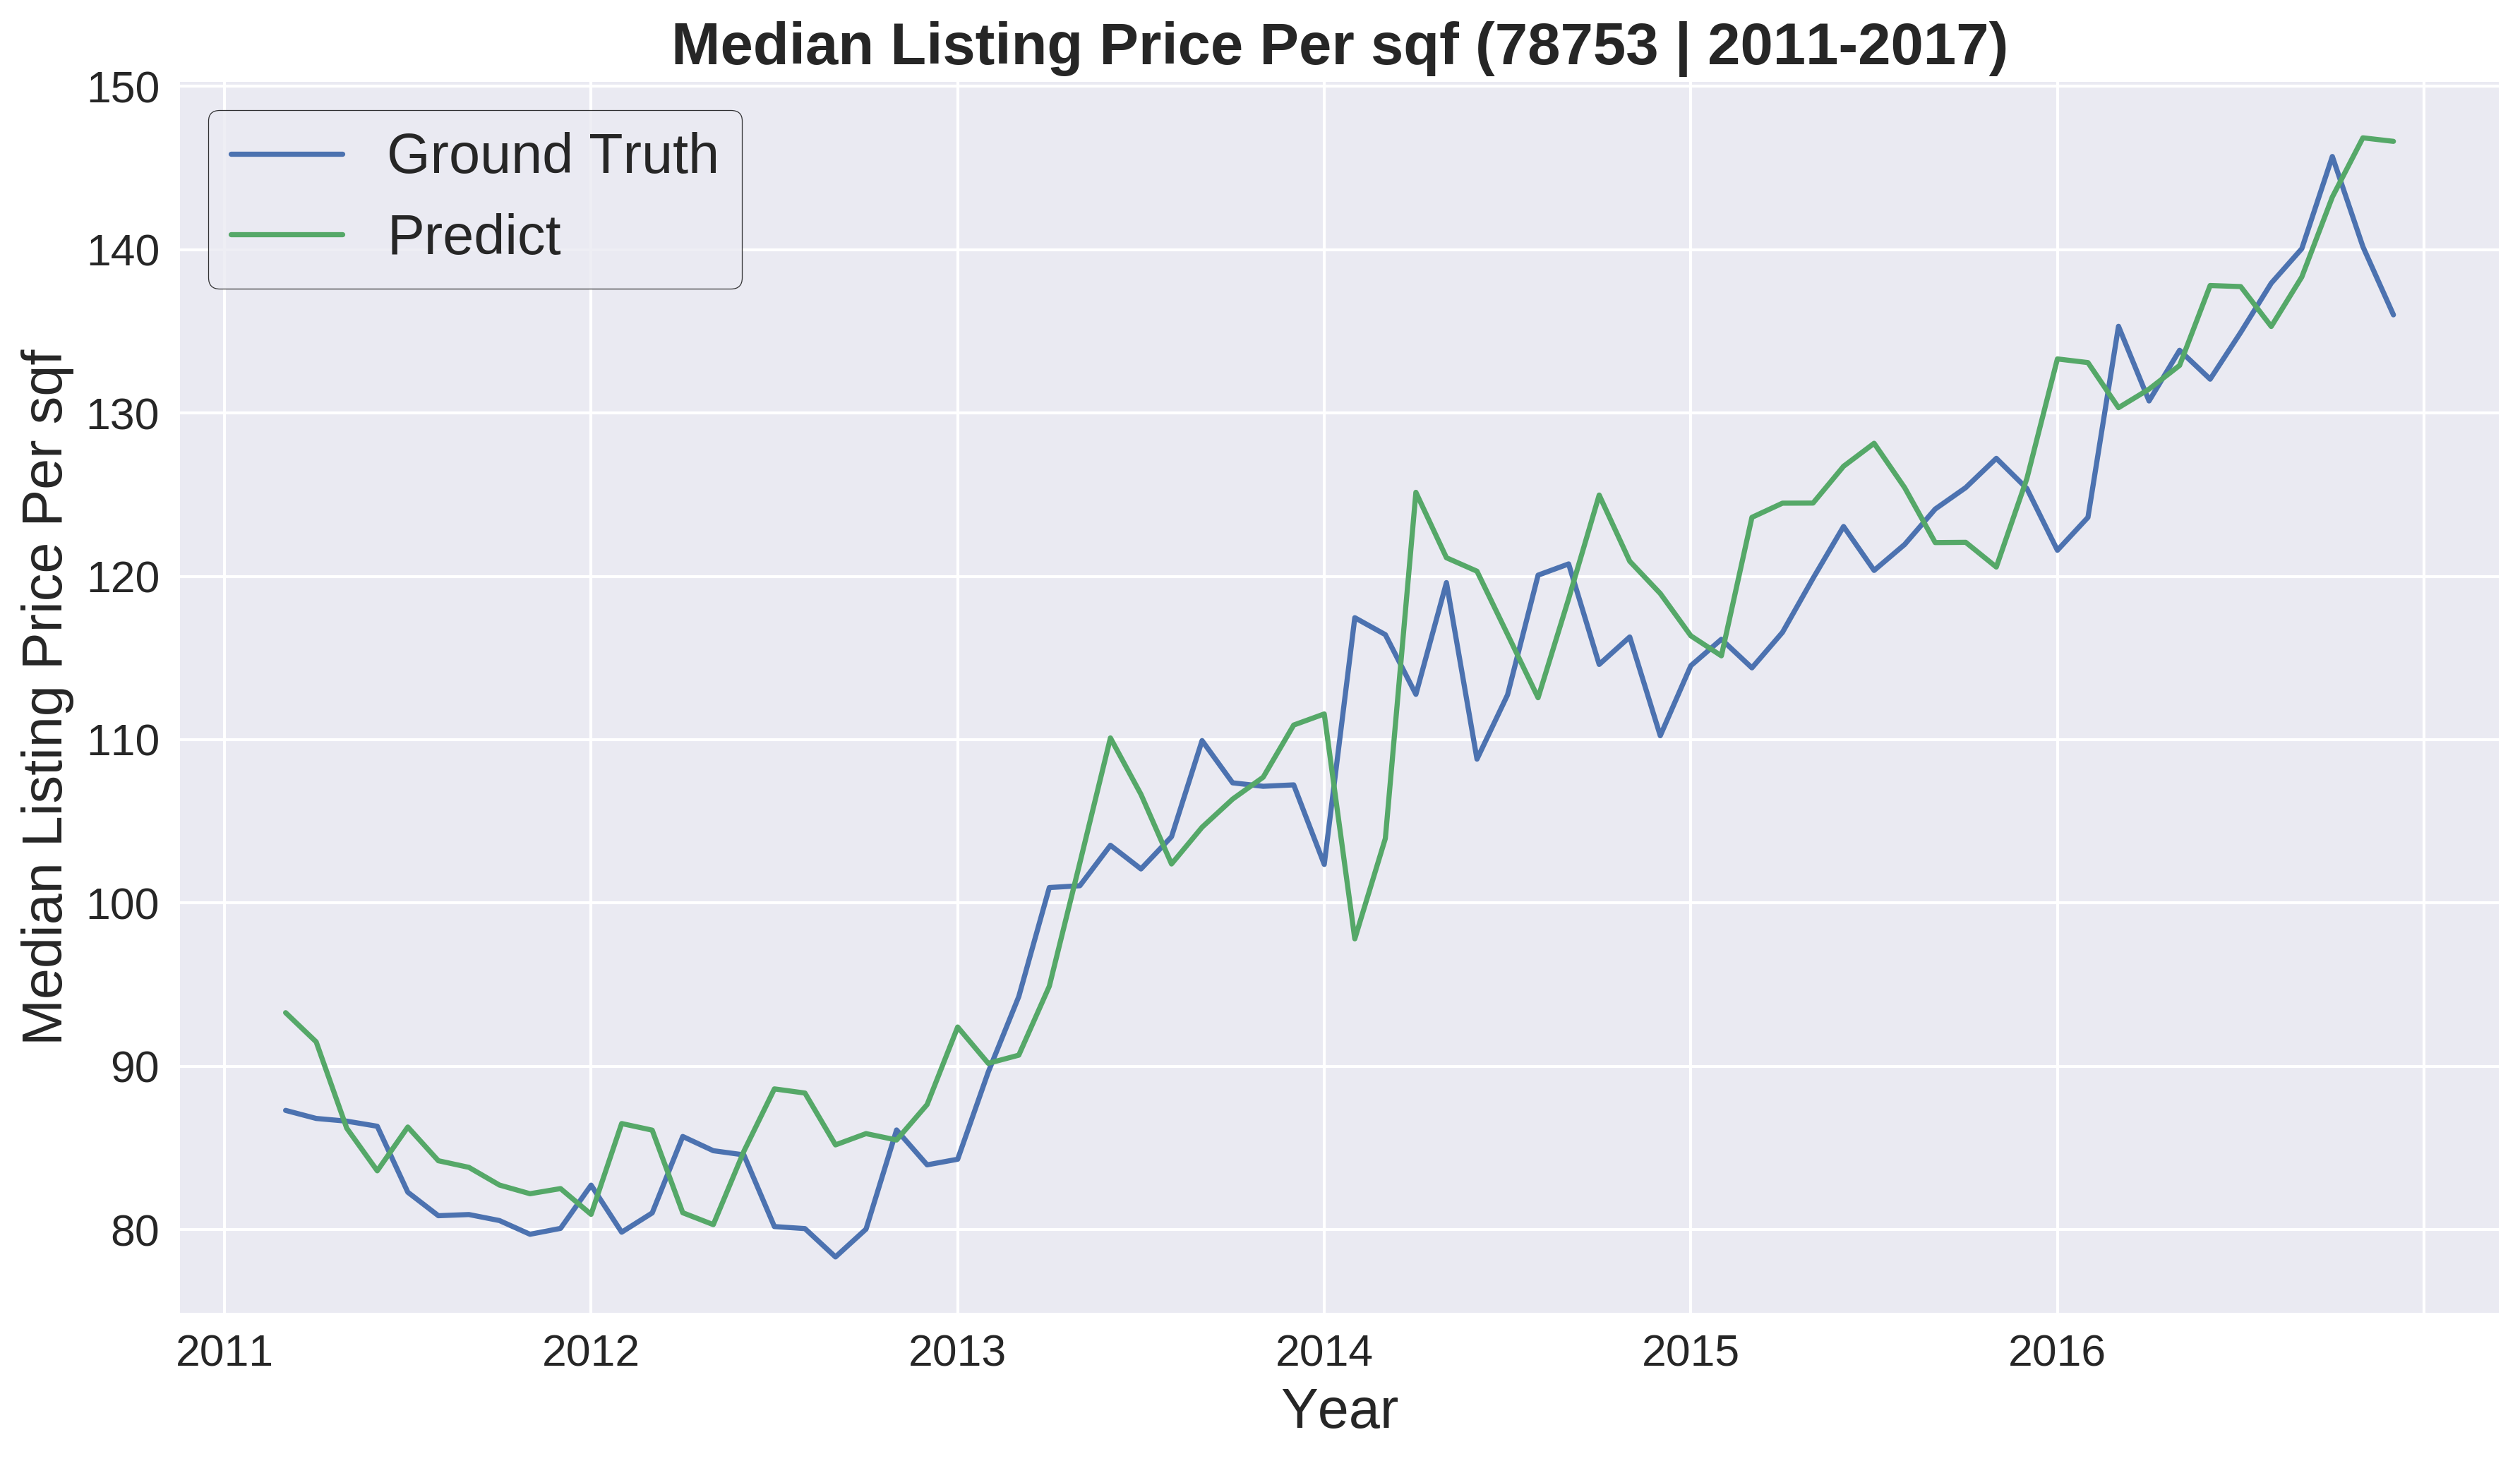

In [37]:
# plot predictions
figsize = (12, 7)
titlefontsize = 20
xtickfontsize = 15
ytickfontsize = 15
labelfontsize = 19
legendfontsize = 19
linewidth = 3

fig = plt.figure(figsize=figsize, dpi=dpi)
ax = fig.subplots(1, 1)
ax.plot(np.arange(n_lags, xy_valid.shape[0]+n_lags), xy_valid[:, index_target], label="Ground Truth")
ax.legend()
ax.plot(np.arange(n_lags, xyhat_valid.shape[0]+n_lags), xyhat_valid[:, index_target], label="Predict")
# ax[1].plot(np.arange(0, y_valid.shape[1]), yhat_valid[0, :], label="Predict")
# ax[1].legend()

ax.set_xticks(np.arange(0,time_stamp.shape[0]+1)[::12])
ax.set_xticklabels(time_stamp[::12], rotation=0)
ax.tick_params(
        axis='x',          
        which='both',      
        bottom=True, 
        top=False,   
        labelbottom=True,
        labelsize=xtickfontsize)
ax.tick_params(
        axis='y',    
        which='both',
        right=True,
        left=True,
        labelsize=ytickfontsize)
ax.legend(loc="best",
          fontsize=legendfontsize,
          framealpha=0.8,
          fancybox=True,
          frameon=True,
          shadow=False,
          edgecolor="k")
ax.set_xlabel("Year", fontsize=labelfontsize)
ax.set_ylabel(f"{columns[index_target]}", fontsize=labelfontsize)

_ = ax.set_title(f"{columns[index_target]} ({zipcode} | {period[0]}-{period[1]})",
             fontsize=titlefontsize,
             fontweight="bold")

plt.tight_layout()
fname = f"trend-plot-predict-{period[0]}-{period[1]}-{zipcode}.png"
fig.savefig(os.path.join(rootdir, "reports", "figures", fname), transparent=False, dpi=dpi)